In [2]:
pip install seaborn

Note: you may need to restart the kernel to use updated packages.


**Import Necessary Libraries**

In [44]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [45]:
df = pd.read_csv('abalone.csv')
df

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7
...,...,...,...,...,...,...,...,...,...
4172,F,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
4173,M,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
4174,M,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9
4175,F,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10


**Add a column named 'age' which is age = Rings + 1.5**

In [46]:
df['age'] = df['Rings'] + 1.5
df.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings,age
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15,16.5
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7,8.5
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9,10.5
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10,11.5
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7,8.5


**Drop Rings column**

In [47]:
df.drop('Rings', axis=1, inplace=True)

In [48]:
df.describe()

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,age
count,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000
mean,0.523992,0.407881,0.139516,0.828742,0.359367,0.180594,0.238831,11.433684
std,0.120093,0.099240,0.041827,0.490389,0.221963,0.109614,0.139203,3.224169
min,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500,2.500000
25%,0.450000,0.350000,0.115000,0.441500,0.186000,0.093500,0.130000,9.500000
50%,0.545000,0.425000,0.140000,0.799500,0.336000,0.171000,0.234000,10.500000
75%,0.615000,0.480000,0.165000,1.153000,0.502000,0.253000,0.329000,12.500000
max,0.815000,0.650000,1.130000,2.825500,1.488000,0.760000,1.005000,30.500000


In [49]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4177 entries, 0 to 4176
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Sex             4177 non-null   object 
 1   Length          4177 non-null   float64
 2   Diameter        4177 non-null   float64
 3   Height          4177 non-null   float64
 4   Whole weight    4177 non-null   float64
 5   Shucked weight  4177 non-null   float64
 6   Viscera weight  4177 non-null   float64
 7   Shell weight    4177 non-null   float64
 8   age             4177 non-null   float64
dtypes: float64(8), object(1)
memory usage: 293.8+ KB


In [50]:
df.isna().sum()

Sex               0
Length            0
Diameter          0
Height            0
Whole weight      0
Shucked weight    0
Viscera weight    0
Shell weight      0
age               0
dtype: int64

In [51]:
df.nunique()

Sex                  3
Length             134
Diameter           111
Height              51
Whole weight      2429
Shucked weight    1515
Viscera weight     880
Shell weight       926
age                 28
dtype: int64

**Split the dataset into 75% of training data and 25% of testing data**

In [52]:
from sklearn.model_selection import train_test_split
train_data, test_data = train_test_split(df, test_size=0.25, random_state=42)

**Divide features into numerical and categorical & specify target variable**

In [53]:
numerical_features = ['Length', 'Diameter', 'Height', 'Whole weight', 'Shucked weight', 'Viscera weight', 'Shell weight']
categorical_features = ['Sex']
features = numerical_features + categorical_features
target = 'age'

**Exploratory Data Analysis**

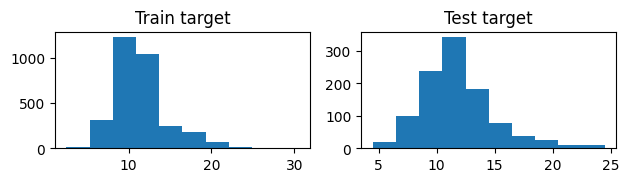

In [54]:
plt.subplot(321)
plt.title('Train target')
plt.hist(train_data['age'])
plt.subplot(322)
plt.title('Test target')
plt.hist(test_data['age'])
plt.tight_layout()
plt.show()


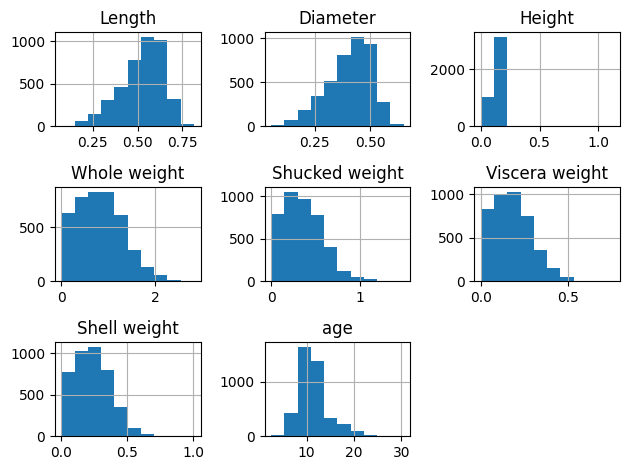

In [55]:
df.hist()
plt.tight_layout()

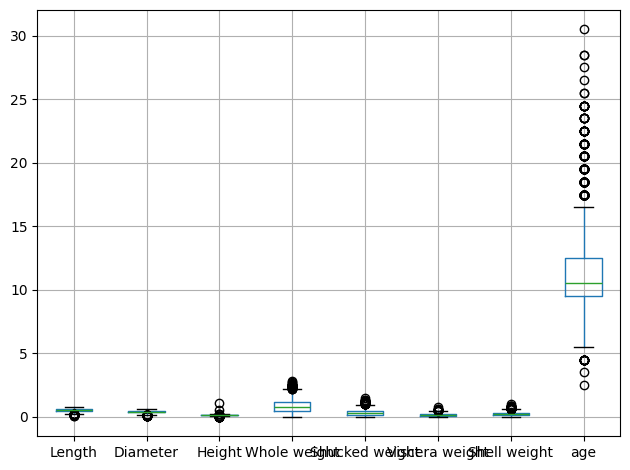

In [56]:
df.boxplot()
plt.tight_layout()

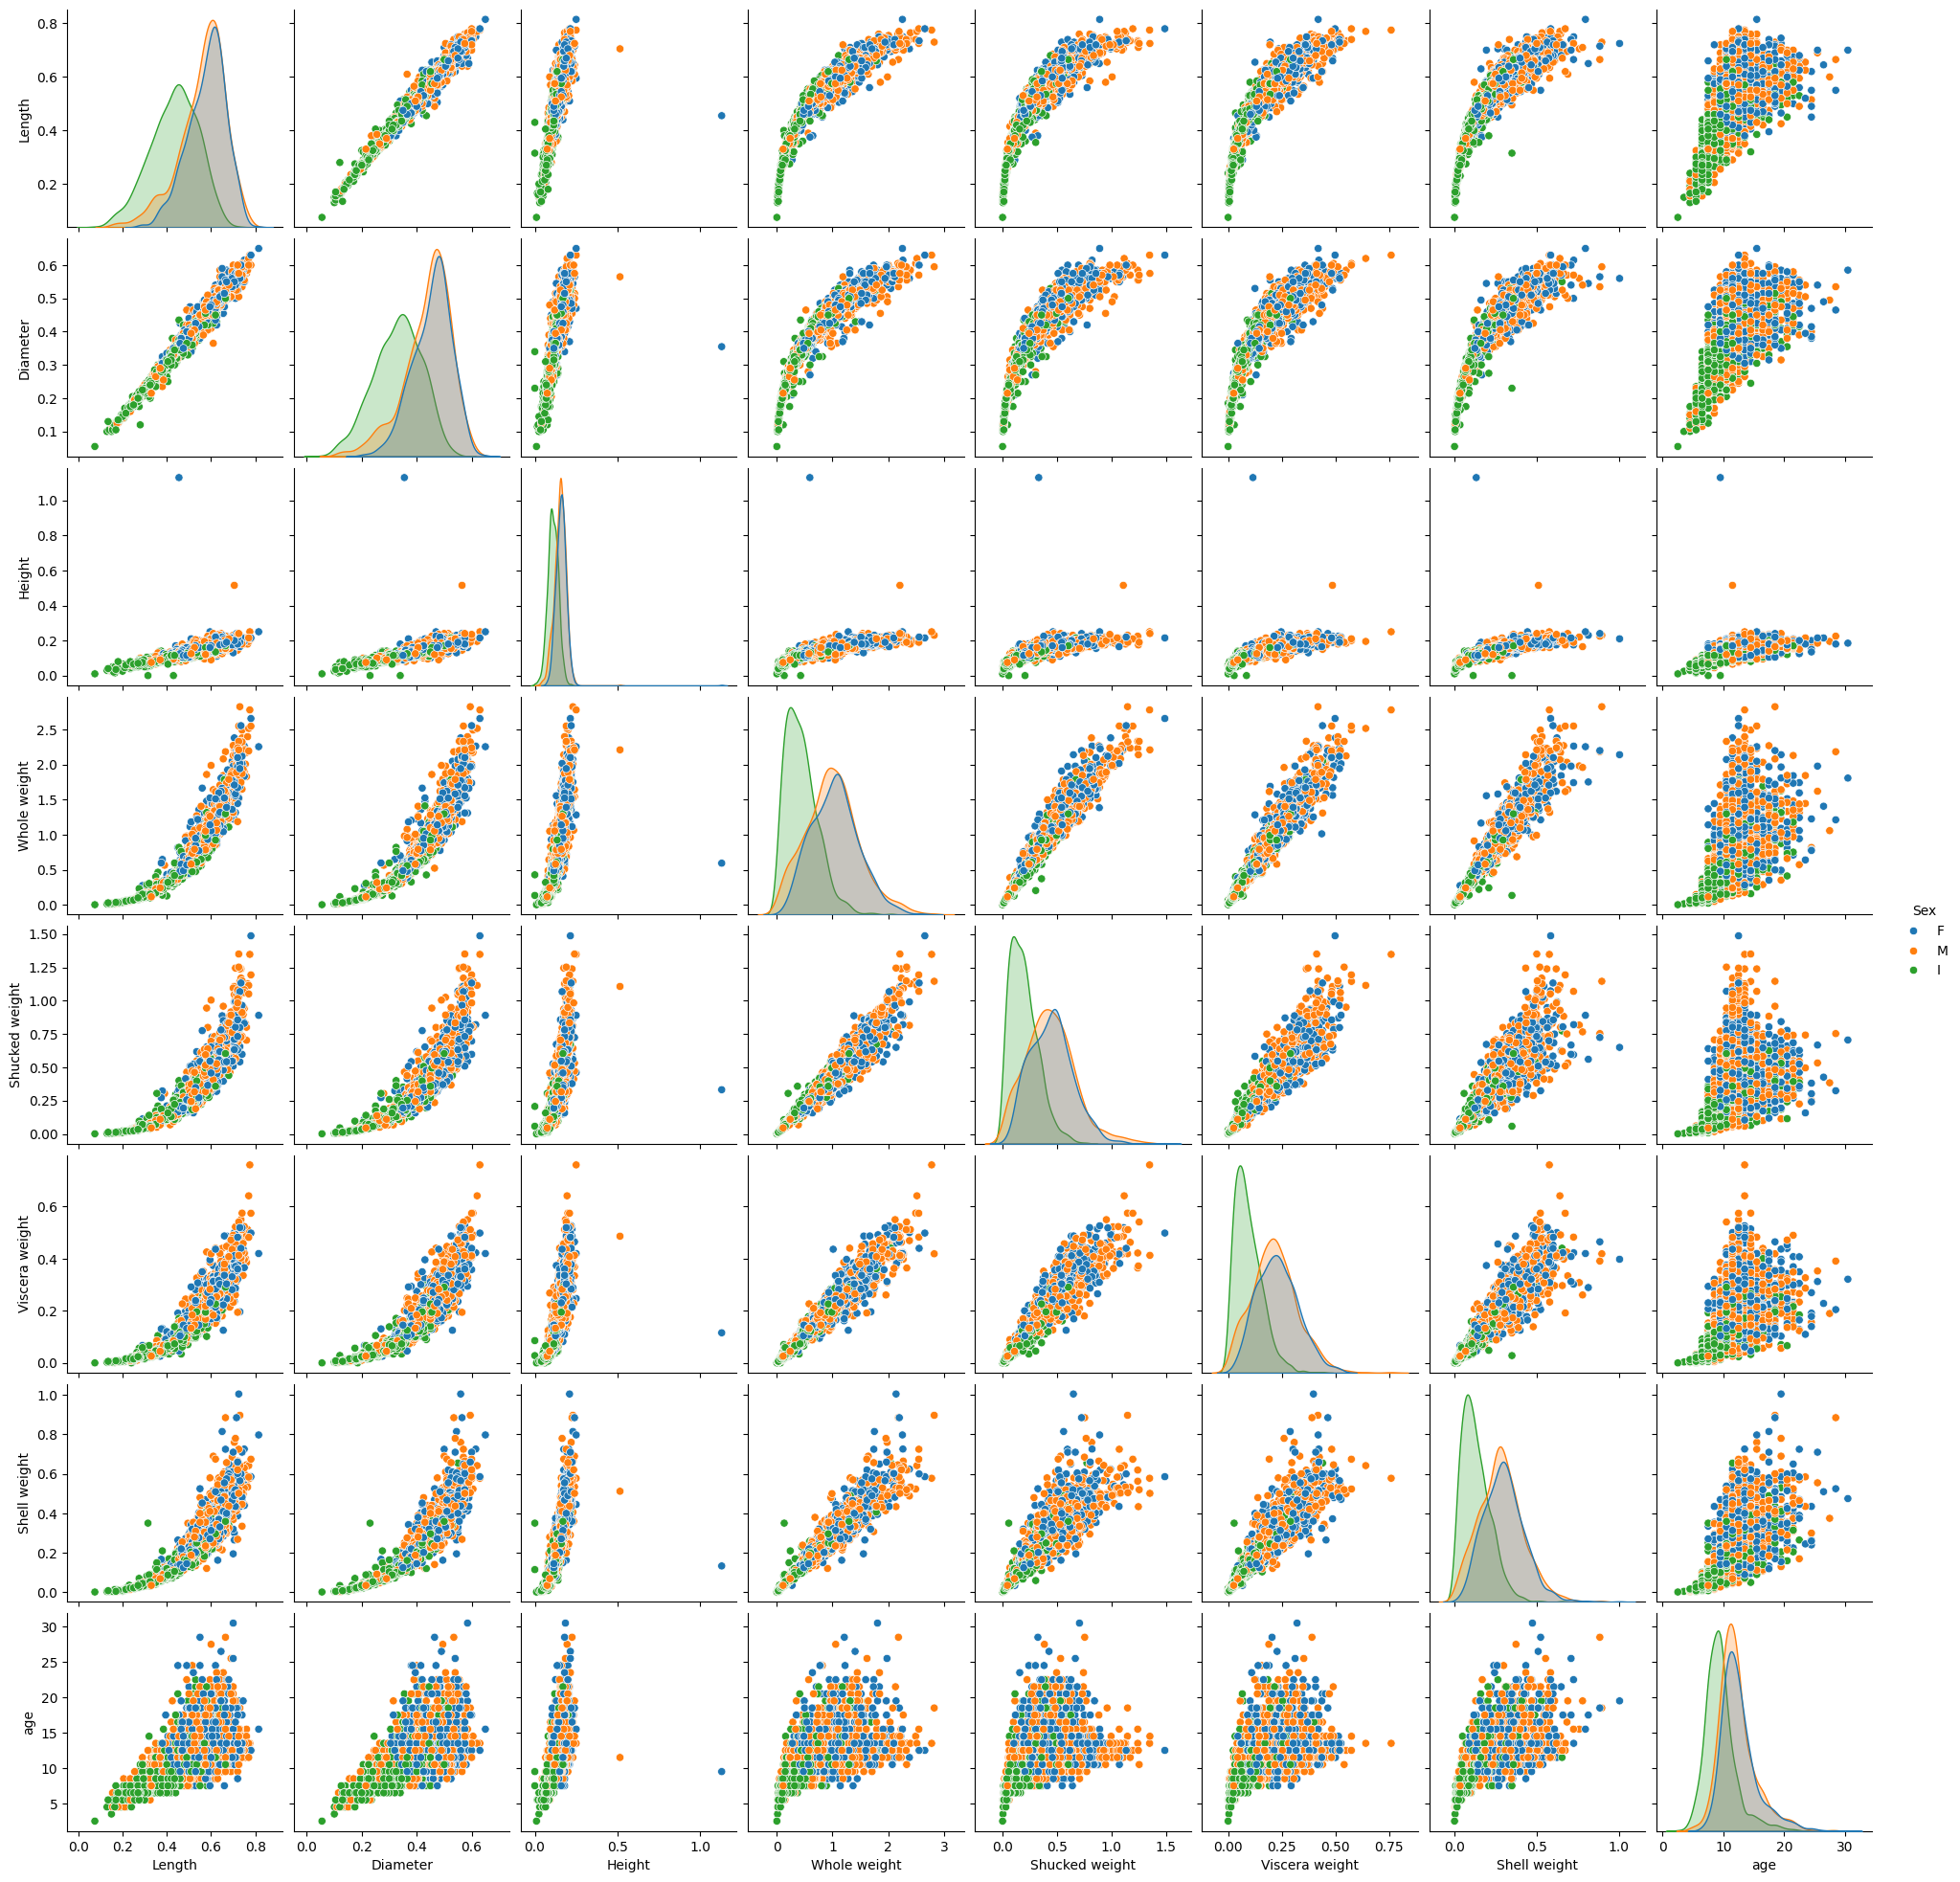

In [57]:
sns.pairplot(train_data, hue='Sex')

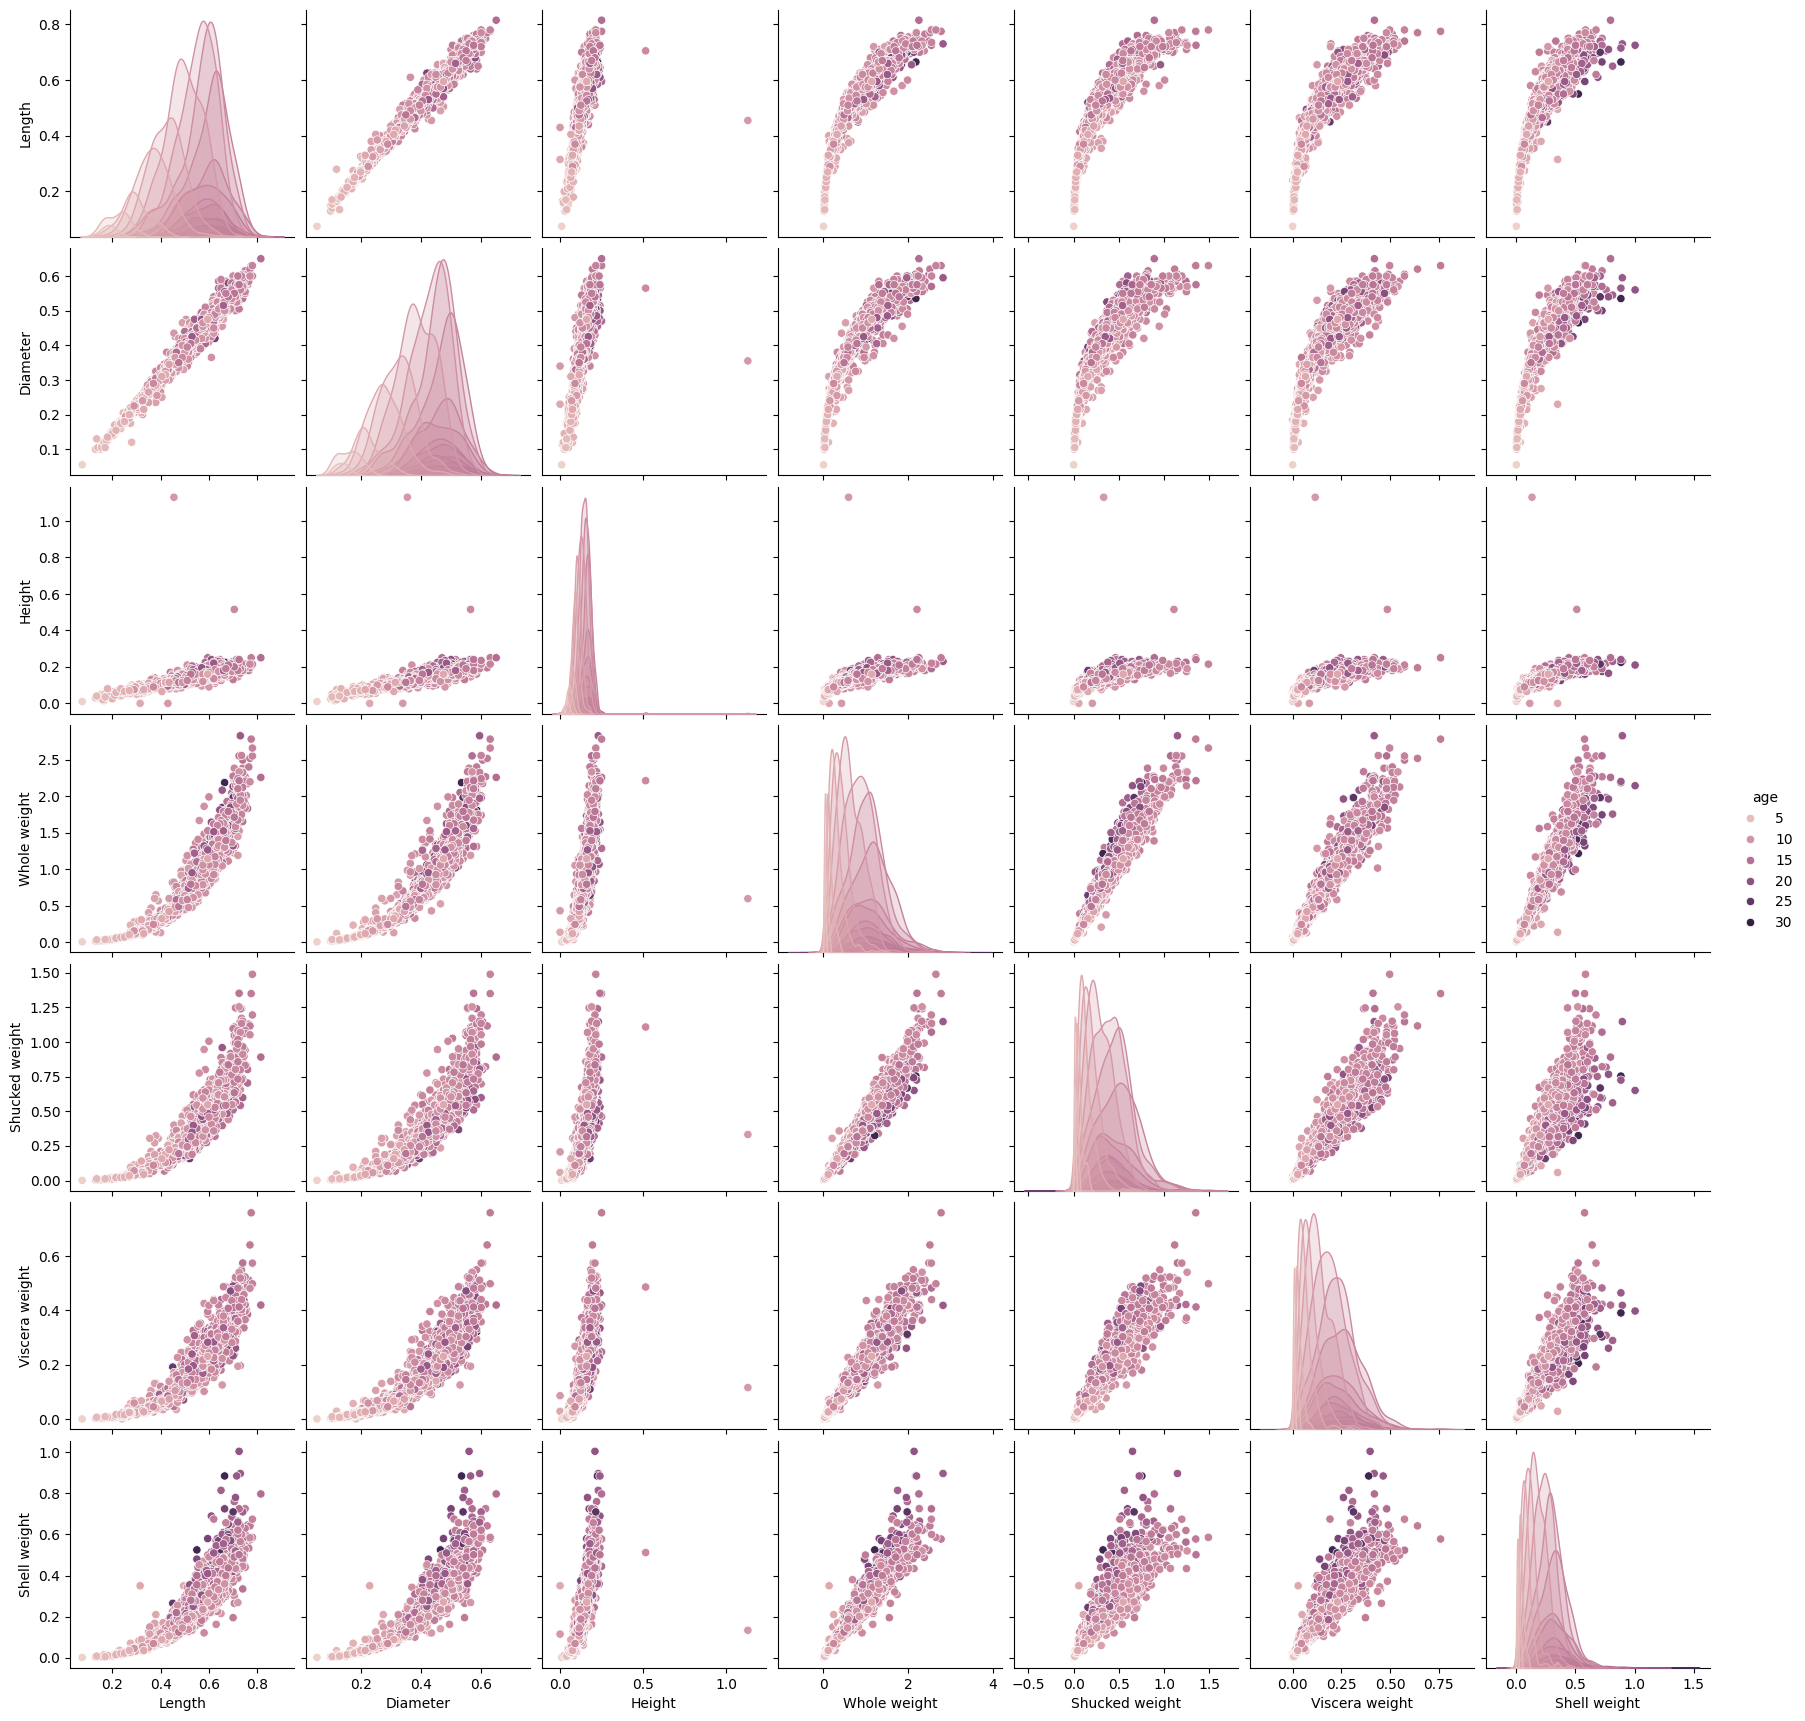

In [58]:
sns.pairplot(train_data, hue='age')

**Use Label Encoder to transform categorical into numerical variables**

In [59]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

train_data['Sex'] = label_encoder.fit_transform(train_data['Sex'])
test_data['Sex'] = label_encoder.transform(test_data['Sex'])

**Remove Outliers from Height**

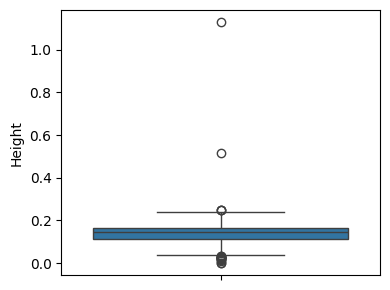

In [60]:
plt.figure(figsize=(4,3))
sns.boxplot(data=train_data['Height'])
plt.tight_layout()
plt.show()

In [61]:
height_idx = train_data.loc[train_data['Height'] > 0.4].index
train_data.drop(height_idx, inplace=True)

**Remove Outliers from Viscera Weight**

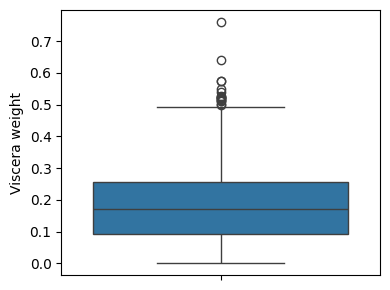

In [62]:
plt.figure(figsize=(4,3))
sns.boxplot(data=train_data['Viscera weight'])
plt.tight_layout()
plt.show()

In [63]:
viscera_idx = train_data.loc[train_data['Viscera weight'] > 0.6].index
train_data.drop(viscera_idx, inplace=True)

**Remove Outliers from Age**

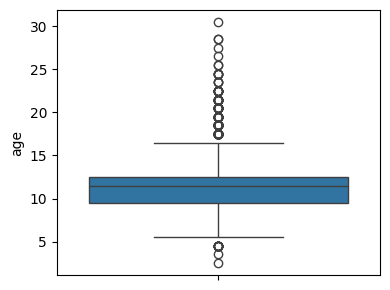

In [64]:
plt.figure(figsize=(4,3))
sns.boxplot(data=train_data['age'])
plt.tight_layout()
plt.show()

In [65]:
age_idx = train_data.loc[train_data['age'] > 25].index
train_data.drop(age_idx, inplace=True)

**Feature Separation**

In [66]:
X_train, y_train = train_data[features], train_data[target]
X_test, y_test = test_data[features], test_data[target]

In [67]:
X_train.head()

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Sex
3823,0.615,0.455,0.135,1.0590,0.4735,0.2630,0.274,0
3956,0.515,0.395,0.140,0.6860,0.2810,0.1255,0.220,0
3623,0.660,0.530,0.175,1.5830,0.7395,0.3505,0.405,2
0,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,2
2183,0.495,0.400,0.155,0.8085,0.2345,0.1155,0.350,2


**Train the model**

In [69]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

linear_regression_model = LinearRegression()
linear_regression_model.fit(X_train, y_train)
train_error = mean_squared_error(y_train, linear_regression_model.predict(X_train))
test_error = mean_squared_error(y_test, linear_regression_model.predict(X_test))
print(f"Train Mean Squared Error: {train_error}")
print(f"Test Mean Squared Error: {test_error}")

Train Mean Squared Error: 4.670218770721555
Test Mean Squared Error: 4.823711172933968


**Make predictions**

In [73]:
import warnings
warnings.filterwarnings('ignore')

In [74]:
sample_input = [[0.295 , 0.225 , 0.08  , 0.124 , 0.0485, 0.032 , 0.04  , 0.]]

age_predicted = linear_regression_model.predict(sample_input)
print(f'Estimated age: {round(age_predicted[0], 2)}')

Estimated age: 8.12
